In [1]:
pip install pandas numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# --- Load Dataset ---
data_path = "/Users/praveenpuviindran/Documents/Current Course Material/DATA481S25/Virology-DATA481/KSV_gex.csv"  # Change to actual filename
df = pd.read_csv(data_path, index_col=0)  # Assumes first column contains gene names

In [5]:
# Display the first few rows
df.head()

,K1_133PP1.TRUE,K1_348PP1.TRUE,K1_622PP1.TRUE,K3_18883PP1.TRUE,K3_19081PP1.TRUE,K3_19577PP1.TRUE,Orf70_20979PP1.TRUE,K4_21778PP1.TRUE,K4_21778.5PP1.TRUE,K4_21780PP1.TRUE,...,K14_129773PP2.TRUE,K14_129773.5PP2.TRUE,K14_129945PP2.TRUE,K14_130126PP2.TRUE,K15_130749PP2.TRUE,K15_131117PP2.TRUE,K15_131117.5PP2.TRUE,K15_131458PP2.TRUE,K15_136250.5PP2.TRUE,K2_17821PP1.TRUE
180,-0.594482,-1.390993,-2.262487,-2.648898,3.897437,-3.448762,-2.356423,-1.046143,-2.885758,-4.333116,...,-13.697114,-0.740135,-2.421017,-7.719628,-0.306850,1.265098,-0.032917,0.983428,-6.201977,0.474952
220,-0.594482,-1.390993,-2.262487,-2.648898,17.166192,-3.448762,-2.356423,-1.685884,-2.885758,-4.333116,...,-13.697114,-0.740135,-1.132262,3.699127,-9.458095,-18.694643,-0.032917,-2.067818,-6.201977,-7.034789
225,0.590534,-0.205977,-1.077470,-1.463882,-4.877287,-2.263746,-1.171407,-0.500867,-1.700742,-3.148099,...,11.647903,0.444881,5.944259,9.695648,6.548426,9.150374,1.152099,7.728704,-5.016960,-5.849773
316,-0.594482,-1.390993,-2.262487,-2.648898,10.616899,5.370440,8.172779,7.523319,8.063444,9.916087,...,11.182089,-0.740135,1.838445,0.939834,2.912612,-8.465440,-0.032917,3.852890,-6.201977,8.304413
541,2.336119,-1.390993,-2.262487,-2.648898,1.868298,-3.448762,-2.356423,-1.685884,2.944843,-4.333116,...,-13.697114,-0.740135,-2.890156,1.491233,-0.005990,5.115958,-0.032917,-3.005712,-6.201977,3.635812


In [6]:
# Extract genome locations from gene names
gene_names = df.columns[1:]  # Excluding the first column
genome_locations = [float(name.split('_')[1].split('PP')[0]) for name in gene_names]

This code extracts the genomic locations from gene names by parsing the gene column names. It assumes that the genome position is embedded within the gene name and extracts the numerical value for further analysis.

In [7]:
# Compute the pairwise distance matrix
distance_matrix = squareform(pdist(np.array(genome_locations).reshape(-1, 1)))

This code computes a pairwise distance matrix between genes based on their extracted genomic locations. The function pdist computes the pairwise Euclidean distances, and squareform converts it into a symmetric matrix.

In [8]:
# Extract the lower triangle (excluding diagonal) and flatten
lower_triangle_indices = np.tril_indices_from(distance_matrix, k=-1)
gene_distances_vector = distance_matrix[lower_triangle_indices]

Since the pairwise distance matrix is symmetric, this step extracts only the lower triangular portion (excluding the diagonal) to avoid redundant values. The resulting values are flattened into a vector for easier storage and visualization.

In [9]:
# Save the gene distances output
gene_distances_path = "/Users/praveenpuviindran/Downloads/gene_distances.csv"
pd.DataFrame(gene_distances_vector).to_csv(gene_distances_path, index=False, header=False)

In [10]:
# Extract expression data (excluding first column with gene identifiers)
expression_data = df.iloc[:, 1:]

In [11]:
# Compute Pearson and Spearman correlation matrices
pearson_corr_matrix = expression_data.corr(method="pearson")
spearman_corr_matrix = expression_data.corr(method="spearman")

This code extracts the gene expression values, excluding the first column containing gene identifiers. It then computes both Pearson and Spearman correlation matrices, capturing linear and rank-based relationships between gene expression levels.

In [12]:
# Function to extract lower triangle (excluding diagonal) and flatten
def extract_lower_triangle(corr_matrix):
    lower_triangle_indices = np.tril_indices_from(corr_matrix, k=-1)
    return corr_matrix.values[lower_triangle_indices]

In [13]:
# Flatten the lower triangle
pearson_lower_triangle = extract_lower_triangle(pearson_corr_matrix)
spearman_lower_triangle = extract_lower_triangle(spearman_corr_matrix)

Similar to the distance matrix, this code extracts only the lower triangle of the correlation matrices to eliminate redundancy, as they are symmetric.

In [14]:
# Save correlation results
pearson_corr_path = "/Users/praveenpuviindran/Downloads/gene_correlations_pearson.csv"
spearman_corr_path = "/Users/praveenpuviindran/Downloads/gene_correlations_spearman.csv"

pd.DataFrame(pearson_lower_triangle).to_csv(pearson_corr_path, index=False, header=False)
pd.DataFrame(spearman_lower_triangle).to_csv(spearman_corr_path, index=False, header=False)

# Output paths
pearson_corr_path, spearman_corr_path, gene_distances_path

('/Users/praveenpuviindran/Downloads/gene_correlations_pearson.csv',
 '/Users/praveenpuviindran/Downloads/gene_correlations_spearman.csv',
 '/Users/praveenpuviindran/Downloads/gene_distances.csv')

In [15]:
# Load the data
gene_distances = pd.read_csv("/Users/praveenpuviindran/Downloads/gene_distances.csv", header=None).squeeze()
pearson_corr = pd.read_csv("/Users/praveenpuviindran/Downloads/gene_correlations_pearson.csv", header=None).squeeze()
spearman_corr = pd.read_csv("/Users/praveenpuviindran/Downloads/gene_correlations_spearman.csv", header=None).squeeze()

In [16]:
gene_distances.head()

0      274.0
1    18535.0
2    18261.0
3    18733.0
4    18459.0
Name: 0, dtype: float64

In [17]:
# Transform gene_distances: duplicate and negate second half
gene_distances_modified = np.concatenate([gene_distances, -gene_distances])

In [18]:
pearson_corr.head()

0    0.407097
1    0.352955
2    0.024926
3    0.191772
4    0.144906
Name: 0, dtype: float64

In [19]:
# Transform pearson_corr: duplicate and negate second half
pearson_corr_modified = np.concatenate([pearson_corr, pearson_corr])

In [20]:
spearman_corr.head()

0    0.730982
1    0.230418
2    0.081157
3    0.187113
4    0.158807
Name: 0, dtype: float64

In [21]:
# Transform pearson_corr: duplicate and negate second half
spearman_corr_modified = np.concatenate([spearman_corr, spearman_corr])

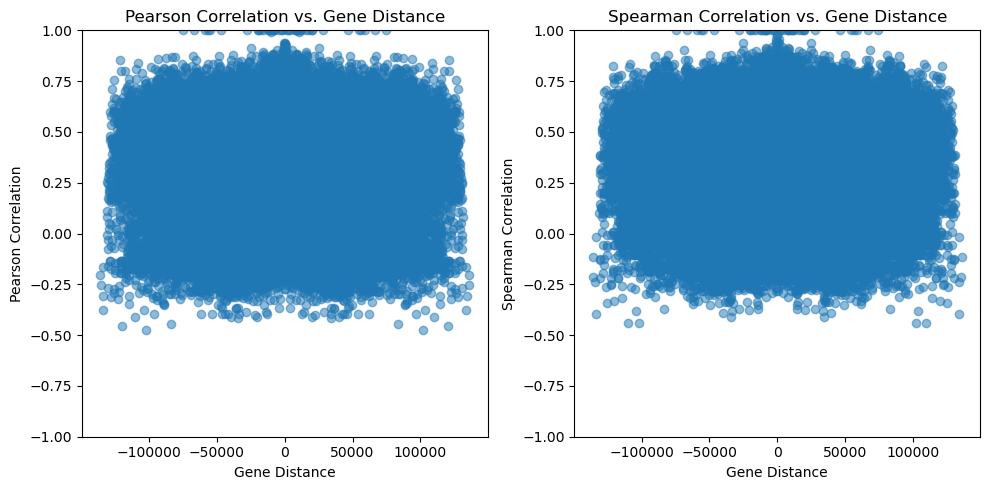

In [43]:
# Create scatter plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(gene_distances_modified, pearson_corr_modified, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Pearson Correlation")
plt.ylim(-1, 1)
plt.title("Pearson Correlation vs. Gene Distance")

plt.subplot(1, 2, 2)
plt.scatter(gene_distances_modified, spearman_corr_modified, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Spearman Correlation")
plt.ylim(-1, 1)
plt.title("Spearman Correlation vs. Gene Distance")

plt.tight_layout()
plt.show()

spearman correlations from -1 to 1

# 3/4 Assignment: Next, make a correlation matrix of just positive distances against pearson correlation so this plot x by y correlations into a matrix and then heatmap/plot.

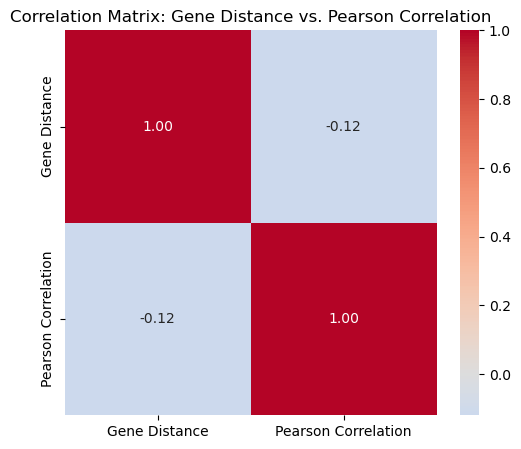

In [33]:
# Create a DataFrame for correlation matrix
correlation_data = pd.DataFrame({"Gene Distance": gene_distances, "Pearson Correlation": pearson_corr})

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Matrix: Gene Distance vs. Pearson Correlation")
plt.show()

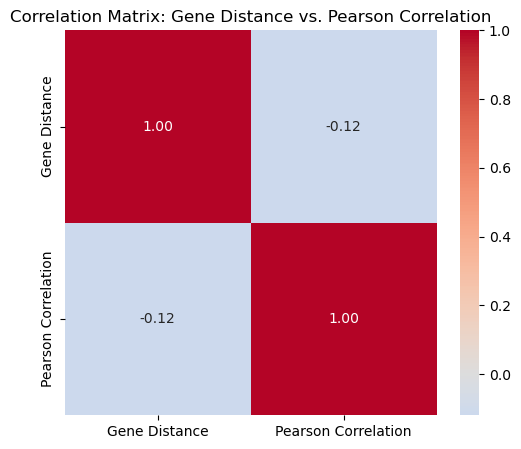

In [34]:
# Ensure the vectors are of equal length
min_length = min(len(gene_distances), len(pearson_corr))
gene_distances = gene_distances[:min_length]
pearson_corr = pearson_corr[:min_length]

# Create DataFrame
correlation_data = pd.DataFrame({
    "Gene Distance": gene_distances,
    "Pearson Correlation": pearson_corr
})

# Remove NaN or infinite values if present
correlation_data = correlation_data.replace([np.inf, -np.inf], np.nan).dropna()

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Matrix: Gene Distance vs. Pearson Correlation")
plt.show()

/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_20660/607943376.py:5: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(gene_distances_modified), pearson_corr_modified, alpha=0.5)
/var/folders/j1/83v578q91g933z2wfdhrd7k80000gn/T/ipykernel_20660/607943376.py:11: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(gene_distances_modified), spearman_corr_modified, alpha=0.5)


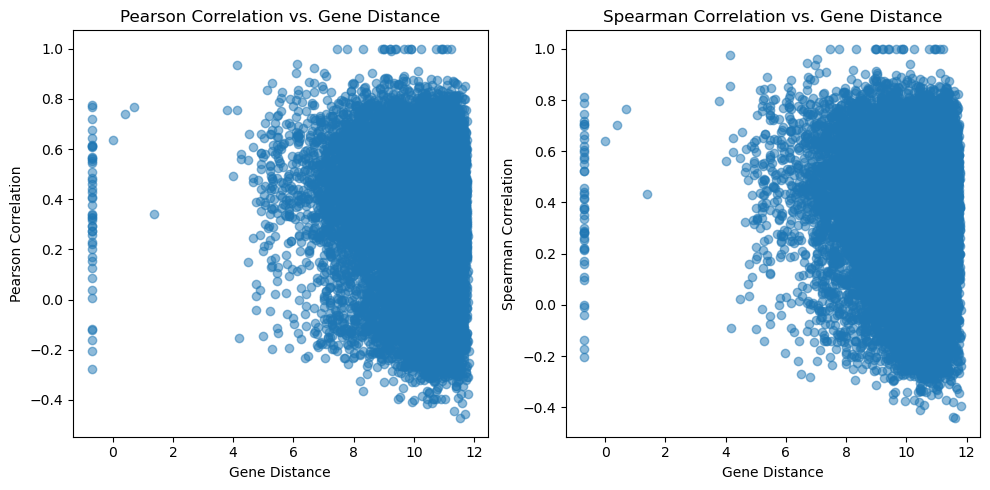

In [35]:
# Create scatter plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(np.log(gene_distances_modified), pearson_corr_modified, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Pearson Correlation")
plt.title("Pearson Correlation vs. Gene Distance")

plt.subplot(1, 2, 2)
plt.scatter(np.log(gene_distances_modified), spearman_corr_modified, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Spearman Correlation")
plt.title("Spearman Correlation vs. Gene Distance")

plt.tight_layout()
plt.show()

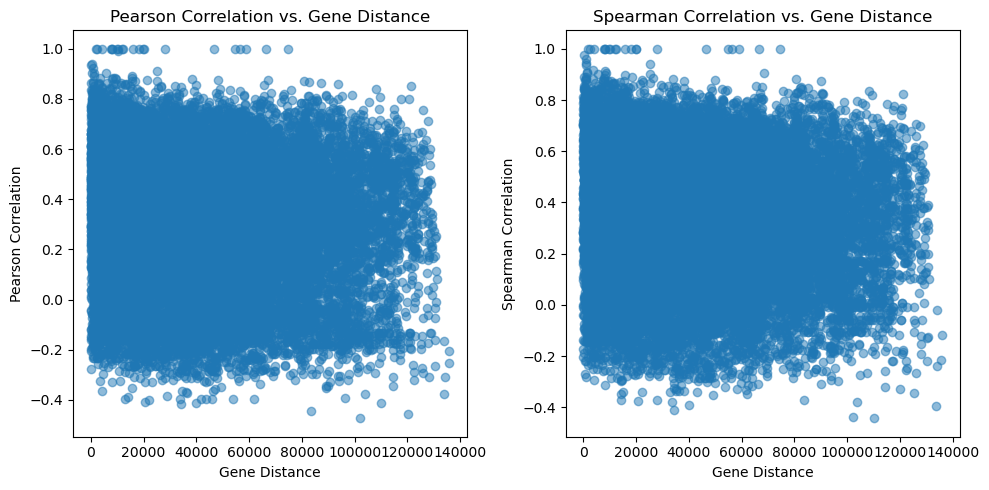

In [36]:
# Create scatter plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(gene_distances, pearson_corr, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Pearson Correlation")
plt.title("Pearson Correlation vs. Gene Distance")

plt.subplot(1, 2, 2)
plt.scatter(gene_distances, spearman_corr, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Spearman Correlation")
plt.title("Spearman Correlation vs. Gene Distance")

plt.tight_layout()
plt.show()

This code generates scatter plots of Pearson and Spearman correlation coefficients against gene distances. It helps visualize whether genes that are closer together tend to be more correlated.

The plots suggest that there is no strong correlation between gene distance and gene expression similarity. The wide spread of points across the graph implies that gene proximity does not consistently predict expression correlation.

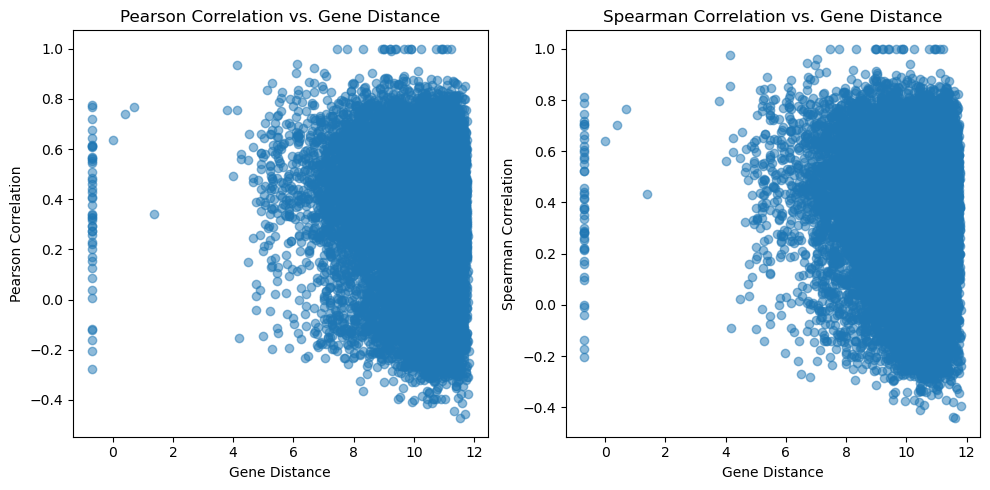

In [37]:
# Create scatter plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(np.log(gene_distances), pearson_corr, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Pearson Correlation")
plt.title("Pearson Correlation vs. Gene Distance")

plt.subplot(1, 2, 2)
plt.scatter(np.log(gene_distances), spearman_corr, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Spearman Correlation")
plt.title("Spearman Correlation vs. Gene Distance")

plt.tight_layout()
plt.show()

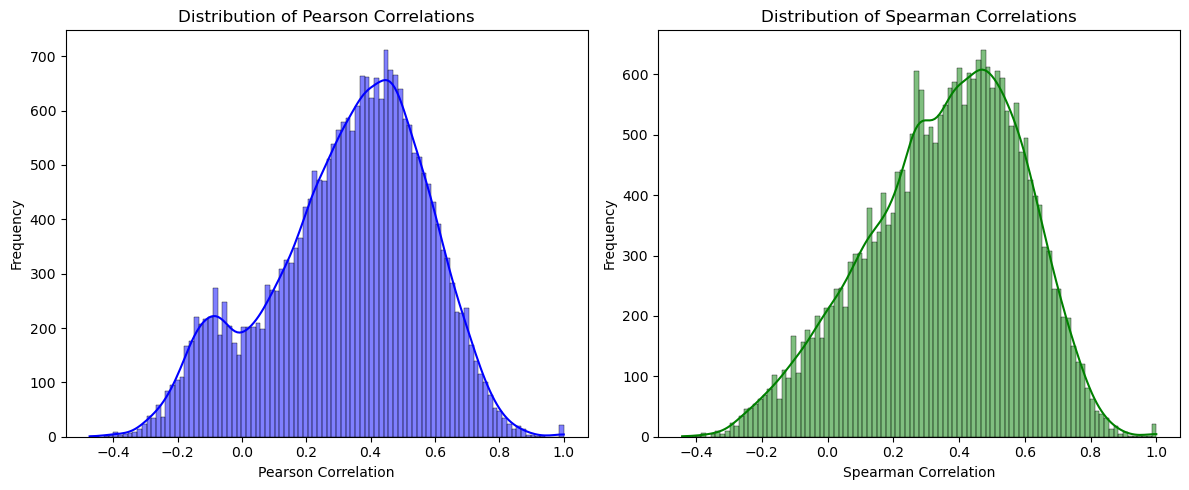

In [38]:
# Ensure data is numeric
pearson_corr = pd.to_numeric(pearson_corr, errors='coerce')
spearman_corr = pd.to_numeric(spearman_corr, errors='coerce')

# Plot histogram and density for both correlation methods
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(pearson_corr, bins=100, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Pearson Correlations")
axes[0].set_xlabel("Pearson Correlation")
axes[0].set_ylabel("Frequency")

sns.histplot(spearman_corr, bins=100, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Spearman Correlations")
axes[1].set_xlabel("Spearman Correlation")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

This code generates histograms of Pearson and Spearman correlation values, providing insight into the distribution of gene expression correlations.

The distributions are skewed toward positive correlation values, indicating that many genes tend to have coordinated expression patterns.
A secondary peak around zero suggests that many gene pairs show weak or no correlation.

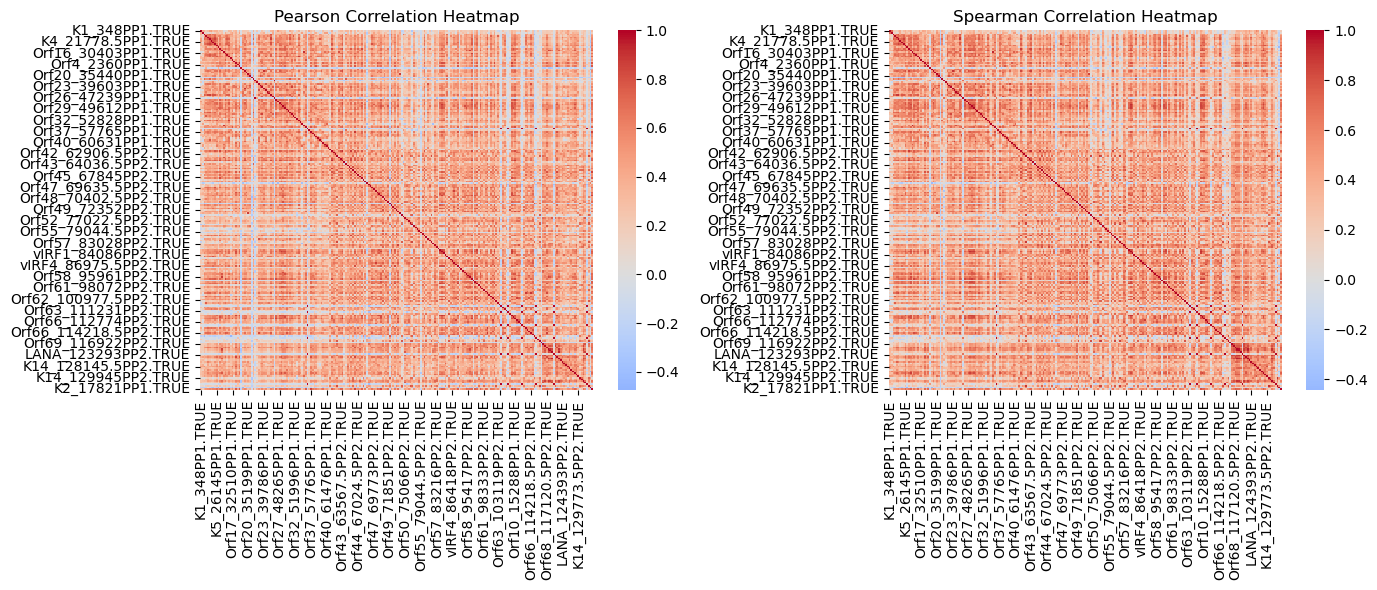

In [39]:
# Set up figure for heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pearson correlation heatmap
sns.heatmap(pearson_corr_matrix, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Pearson Correlation Heatmap")

# Spearman correlation heatmap
sns.heatmap(spearman_corr_matrix, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Spearman Correlation Heatmap")

plt.tight_layout()
plt.show()

This code generates heatmaps of the Pearson and Spearman correlation matrices, allowing for visual inspection of clusters of co-expressed genes.

Strong red or blue clusters indicate sets of genes with highly correlated expression.
The dense structure of the heatmap suggests widespread interdependencies among genes.

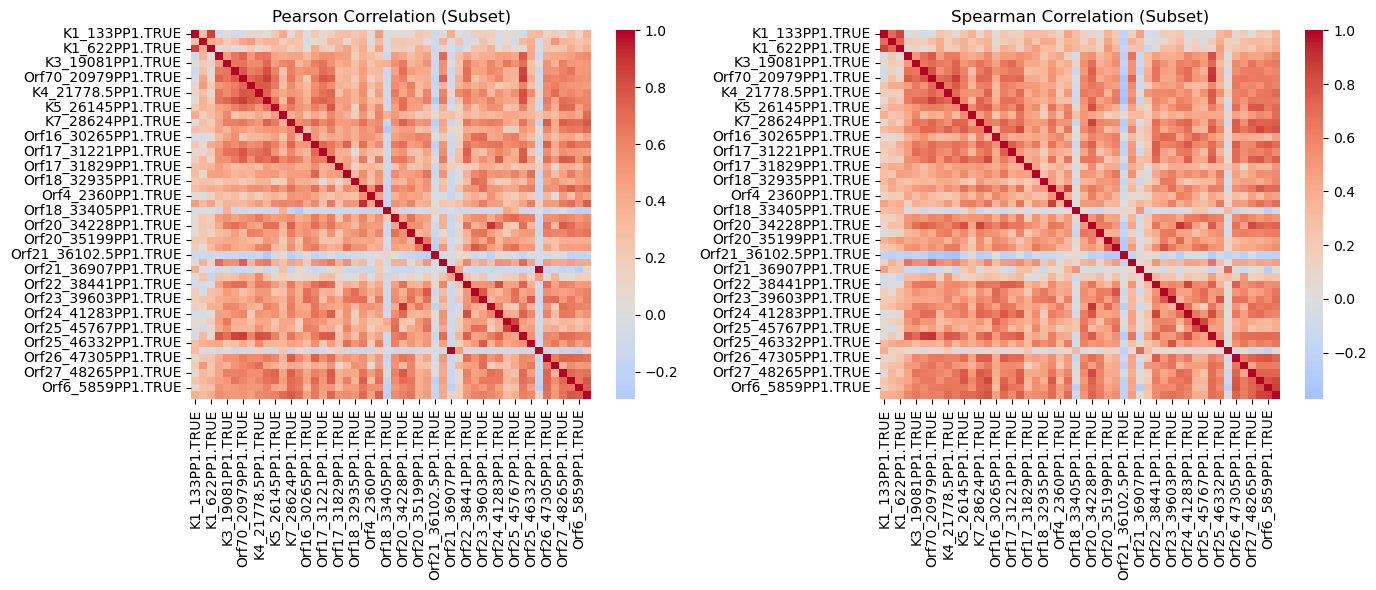

In [40]:
# Select a subset of genes (e.g., first 50 genes)
subset_genes = df.iloc[:, :50]  # Adjust the number as needed

# Compute Pearson and Spearman correlation matrices for the subset
pearson_corr_subset = subset_genes.corr(method="pearson")
spearman_corr_subset = subset_genes.corr(method="spearman")

# Set up figure for heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pearson correlation heatmap
sns.heatmap(pearson_corr_subset, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Pearson Correlation (Subset)")

# Spearman correlation heatmap
sns.heatmap(spearman_corr_subset, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Spearman Correlation (Subset)")

plt.tight_layout()
plt.show()

In [41]:
# Save full correlation matrices as CSV files
pearson_corr_matrix.to_csv("/Users/praveenpuviindran/Downloads/pearson_correlation_matrix.csv")
spearman_corr_matrix.to_csv("/Users/praveenpuviindran/Downloads/spearman_correlation_matrix.csv")

# Display sample output (first 5 rows)
print("Pearson Correlation Matrix Sample:")
print(pearson_corr_matrix.head())

print("\nSpearman Correlation Matrix Sample:")
print(spearman_corr_matrix.head())

Pearson Correlation Matrix Sample:
                  K1_348PP1.TRUE  K1_622PP1.TRUE  K3_18883PP1.TRUE  \
K1_348PP1.TRUE          1.000000        0.407097          0.352955   
K1_622PP1.TRUE          0.407097        1.000000          0.024926   
K3_18883PP1.TRUE        0.352955        0.024926          1.000000   
K3_19081PP1.TRUE        0.191772        0.144906          0.481583   
K3_19577PP1.TRUE        0.283921        0.008603          0.649049   

                  K3_19081PP1.TRUE  K3_19577PP1.TRUE  Orf70_20979PP1.TRUE  \
K1_348PP1.TRUE            0.191772          0.283921             0.440769   
K1_622PP1.TRUE            0.144906          0.008603             0.073027   
K3_18883PP1.TRUE          0.481583          0.649049             0.739476   
K3_19081PP1.TRUE          1.000000          0.659337             0.666837   
K3_19577PP1.TRUE          0.659337          1.000000             0.770100   

                  K4_21778PP1.TRUE  K4_21778.5PP1.TRUE  K4_21780PP1.TRUE  \
K1_34

In [42]:
# Pearson correlation heatmap
sns.heatmap(pearson_corr_matrix, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Pearson Correlation (Subset)")

Text(0.5, 1.0, 'Pearson Correlation (Subset)')